## QISKIT

In [740]:
from qiskit import QuantumCircuit, transpile, assemble
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram
import numpy as np

In [741]:
def multi_qubit_sum(qc, multi_qubs, ancillas, pre_constraint_len):
    for idx, comb in enumerate(multi_qubs):
        ancilla_idx = pre_constraint_len + (2 * idx)

        
        qc.cx(comb[0], ancillas[ancilla_idx])
        qc.cx(comb[1], ancillas[ancilla_idx])
        qc.cx(comb[2], ancillas[ancilla_idx])

        qc.ccx(comb[0], comb[1], ancillas[ancilla_idx + 1])
        qc.ccx(comb[2], ancillas[ancilla_idx + 1], ancillas[ancilla_idx])
        qc.ccx(comb[0], comb[1], ancillas[ancilla_idx + 1])

        qc.barrier()

In [742]:
def two_qubit_diagonal_constraints(qc, qub_diag, ancillas, pre_constraint_len):
    for idx, comb in enumerate(qub_diag):
        qc.x(ancillas[idx + pre_constraint_len])
        qc.ccx(comb[0], comb[1], ancillas[idx + pre_constraint_len])
        qc.barrier()

In [743]:
def three_qubit_diagonal_constraints(qc, qub_diag, ancillas, pre_constraint_len):
    for idx, comb in enumerate(qub_diag):
        qc.x(ancillas[idx + pre_constraint_len])
        # qc.mcx([comb[0], comb[1], comb[2]], ancillas[idx + pre_constraint_len])
        qc.barrier()

In [744]:
def four_qubit_diagonal_constraints(qc, qub_diag, ancillas, pre_constraint_len):
    for idx, comb in enumerate(qub_diag):
        qc.x(ancillas[idx + pre_constraint_len])
        qc.mcx([comb[0], comb[1], comb[2], comb[3]], ancillas[idx + pre_constraint_len])
        qc.barrier()

In [745]:
def check_all_one(qc, qubits, ancillas, pre_constraint_len):
    num_ancillas = len(ancillas)

    for idx in range(pre_constraint_len):
        if idx >= 1:
            qc.ccx(ancillas[idx], ancillas[idx + pre_constraint_len - 1], ancillas[idx + pre_constraint_len])

        else:
            qc.cx(ancillas[idx], ancillas[idx + pre_constraint_len])

    qc.barrier()
    qc.cx(ancillas[pre_constraint_len + pre_constraint_len - 1], ancillas[pre_constraint_len + pre_constraint_len])
    qc.barrier()

    for idx in reversed(range(pre_constraint_len)):
        if idx >= 1:
            qc.ccx(ancillas[idx], ancillas[idx + pre_constraint_len - 1], ancillas[idx + pre_constraint_len])

        else:
            qc.cx(ancillas[idx], ancillas[idx + pre_constraint_len])

    qc.barrier()

In [746]:
def grover_diff(qc, qubits, ancillas, pre_constraint_len):
    qc.h(qubits)
    qc.x(qubits)
    qc.barrier()

    pre_constraint_len += 1

    qc.ccx(qubits[0], qubits[1], ancillas[pre_constraint_len + len(qubits)])

    # num_iterations = len(qubits) - 2
    num_iterations = len(qubits) - 3
    aux = 2

    for idx in range(num_iterations):
        qc.ccx(qubits[aux + idx], ancillas[idx + pre_constraint_len + len(qubits)], ancillas[idx + pre_constraint_len + len(qubits) + 1])

    qc.barrier()
    qc.cz(qubits[-1], ancillas[-1])
    qc.barrier()

    for idx in reversed(range(num_iterations)):
        qc.ccx(qubits[aux + idx], ancillas[idx + pre_constraint_len + len(qubits)], ancillas[idx + pre_constraint_len + len(qubits) + 1])

    qc.ccx(qubits[0], qubits[1], ancillas[pre_constraint_len + len(qubits)])

    qc.barrier()
    qc.x(qubits)
    qc.h(qubits)
    qc.barrier()

In [747]:
n_qubits = 12
n_ancillas = 73

qub_multi_sum = [
    [0, 1, 2],
    [3, 4, 5],
    [6, 7, 8],
    [9, 10, 11],
    [3, 6, 9],
    [0, 7, 10],
    [1, 4, 11],
    [2, 5, 8]
]

qubits = list(range(12))
ancillas = list(range(n_qubits, n_ancillas + 1))

circ = QuantumCircuit(73, 12)
# circ = QuantumCircuit(82, 12)

In [748]:
print(qubits)
print(ancillas)
print(list(range(0,76)))
print(len(ancillas))

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]
[12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75]
62


In [749]:
pre_con_len = 0
multi_qubit_sum(circ, qub_multi_sum, ancillas, pre_con_len)

In [750]:
# circ.draw('mpl')

In [751]:
# pre_con_len += len(qub_multi_sum) + 1
pre_con_len = len(qub_multi_sum) * 2

two_qub_diag_sum = [
    [0, 3],
    [1, 6],
    [5, 10],
    [8, 11],
    [1, 5],
    [6, 10]
]

In [752]:
two_qubit_diagonal_constraints(circ, two_qub_diag_sum, ancillas, pre_con_len)

In [753]:
# circ.draw('mpl')

In [754]:
pre_con_len += len(two_qub_diag_sum)

three_qubit_diagonal_sum = [
    [0, 4, 8],
    [3, 7, 11]
]


In [755]:
three_qubit_diagonal_constraints(circ, three_qubit_diagonal_sum, ancillas, pre_con_len)

In [756]:
# circ.draw('mpl')

In [757]:
pre_con_len += len(three_qubit_diagonal_sum)

four_qub_diag_sum = [
    [2, 4, 7, 9]
]

In [758]:
four_qubit_diagonal_constraints(circ, four_qub_diag_sum, ancillas, pre_con_len)

In [759]:
# circ.draw('mpl')

In [760]:
pre_con_len += len(four_qub_diag_sum)

In [761]:
check_all_one(circ, qubits, ancillas, pre_con_len)

In [762]:
# circ.draw('mpl')

In [763]:
circ.z(ancillas[pre_con_len + pre_con_len])
circ.barrier()

CircuitInstruction(operation=Instruction(name='barrier', num_qubits=73, num_clbits=0, params=[]), qubits=(Qubit(QuantumRegister(73, 'q'), 0), Qubit(QuantumRegister(73, 'q'), 1), Qubit(QuantumRegister(73, 'q'), 2), Qubit(QuantumRegister(73, 'q'), 3), Qubit(QuantumRegister(73, 'q'), 4), Qubit(QuantumRegister(73, 'q'), 5), Qubit(QuantumRegister(73, 'q'), 6), Qubit(QuantumRegister(73, 'q'), 7), Qubit(QuantumRegister(73, 'q'), 8), Qubit(QuantumRegister(73, 'q'), 9), Qubit(QuantumRegister(73, 'q'), 10), Qubit(QuantumRegister(73, 'q'), 11), Qubit(QuantumRegister(73, 'q'), 12), Qubit(QuantumRegister(73, 'q'), 13), Qubit(QuantumRegister(73, 'q'), 14), Qubit(QuantumRegister(73, 'q'), 15), Qubit(QuantumRegister(73, 'q'), 16), Qubit(QuantumRegister(73, 'q'), 17), Qubit(QuantumRegister(73, 'q'), 18), Qubit(QuantumRegister(73, 'q'), 19), Qubit(QuantumRegister(73, 'q'), 20), Qubit(QuantumRegister(73, 'q'), 21), Qubit(QuantumRegister(73, 'q'), 22), Qubit(QuantumRegister(73, 'q'), 23), Qubit(QuantumReg

In [764]:
# circ.draw('mpl')

In [765]:
check_all_one(circ, qubits, ancillas, pre_con_len)

In [766]:
# circ.draw('mpl')

In [767]:
pre_con_len -= len(four_qub_diag_sum)
four_qubit_diagonal_constraints(circ, four_qub_diag_sum, ancillas, pre_con_len)

In [768]:
# circ.draw('mpl')

In [769]:
pre_con_len -= len(three_qubit_diagonal_sum)
three_qubit_diagonal_constraints(circ, three_qubit_diagonal_sum, ancillas, pre_con_len)

In [770]:
# circ.draw('mpl')

In [771]:
pre_con_len -= len(two_qub_diag_sum)
two_qubit_diagonal_constraints(circ, two_qub_diag_sum, ancillas, pre_con_len)

In [772]:
# circ.draw('mpl')

In [773]:
pre_con_len = 0
multi_qubit_sum(circ, qub_multi_sum, ancillas, pre_con_len)

In [774]:
# circ.draw('mpl', scale=0.5)

In [775]:
pre_con_len = ((len(qub_multi_sum) * 2) + len(two_qub_diag_sum) + len(three_qubit_diagonal_sum) + len(four_qub_diag_sum) ) * 2
print(pre_con_len)

50


In [776]:
grover_diff(circ, qubits, list(range(0, 73)), pre_con_len)

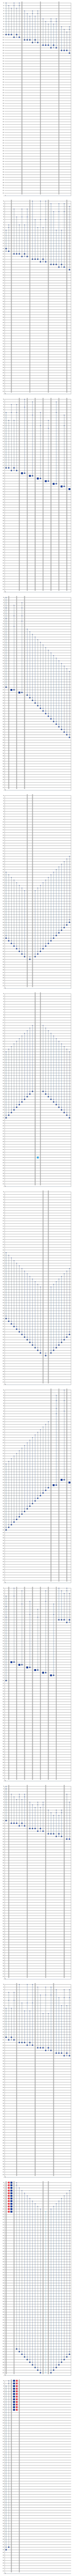

In [777]:
circ.draw('mpl', scale=0.5)

In [778]:
circuito = QuantumCircuit(73, 12)
circuito.h(range(12))

In [779]:
for _ in range(int(np.sqrt(2**n_qubits))):
    circuito.compose(circ, inplace=True)

circuito.measure(range(12), range(12))

In [781]:
simulator = AerSimulator(method='statevector')
compiled_circuit = transpile(circuito, simulator)
result = simulator.run(compiled_circuit, shots=1024).result()

CircuitTooWideForTarget: 'Number of qubits (73) in circuit-197 is greater than maximum (32) in the coupling_map'